# 图像的 RGB 通道图像

In [1]:
# 用 skimage 中的io模块读取图像
# import skimage.io as io
from skimage import data, io
import matplotlib.pyplot as plt

In [2]:
# 提取像素
imrgb = io.imread('Doraemon.jpg')
print('before reshape:', imrgb.shape)

before reshape: (650, 862, 3)


In [3]:
# 第三个维度分别对应 R, G, B 像素值
# 将 imrgb 拼接成一个行向量
imvec = imrgb.reshape(1, -1)
print('after reshape:', imvec.shape)
plt.gray() # 灰度图

after reshape: (1, 1680900)


<Figure size 640x480 with 0 Axes>

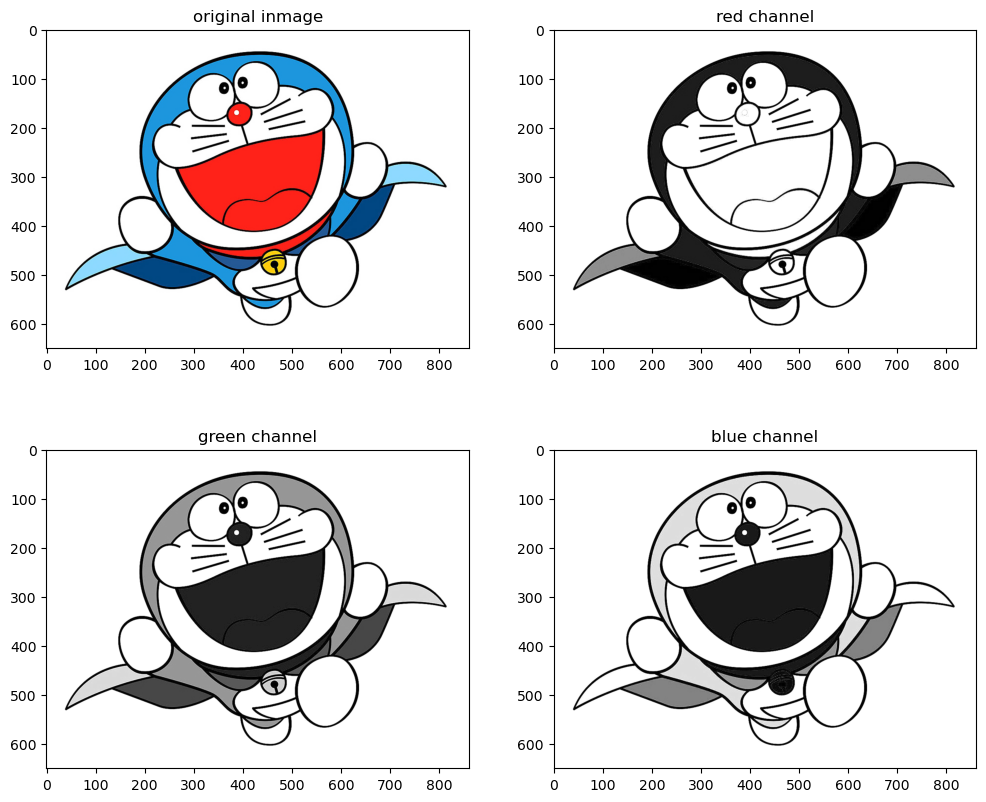

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(imrgb)
ax0.set_title('original inmage')
# Red 通道
ax1.imshow(imrgb[:, :, 0])
ax1.set_title('red channel')
# Green 通道
ax2.imshow(imrgb[:, :, 1])
ax2.set_title('green channel')
# Blue 通道
ax3.imshow(imrgb[:, :, 2])
ax3.set_title('blue channel')
plt.show()

# 提取角点图像

In [1]:
import numpy as np
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

In [2]:
def show_corners(corners, image, step=5):
    fig = plt.figure()
    # 灰度图
    plt.gray()
    plt.imshow(image)
    # 角点的像素作为坐标
    y_corner, x_corner = zip(*corners[::step])  # 每隔step个角点显示一个
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

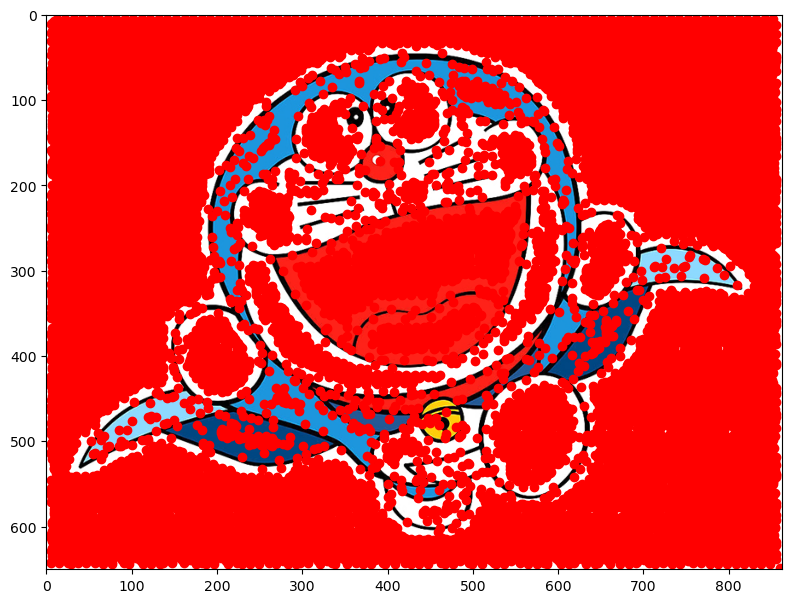

In [3]:
imrgb = io.imread('Doraemon.jpg')
# 直方图均衡化,增强对比
imgray = equalize_hist(rgb2gray(imrgb))
corners = corner_peaks(corner_harris(imgray))
show_corners(corners, imrgb)